In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier 

Step 1: create a model and save it to disk

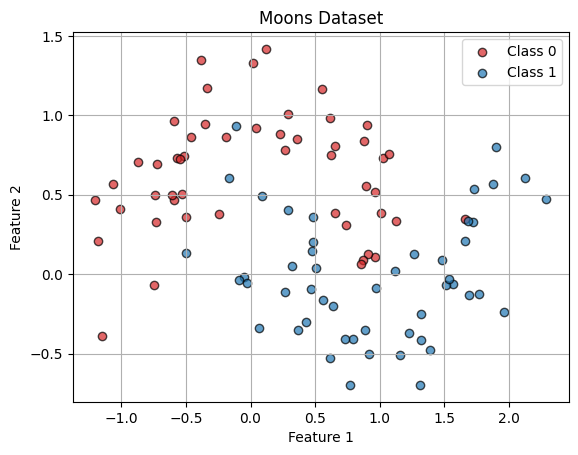

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:,0][y==0], X[:,1][y==0],  c='tab:red', edgecolors='k', label='Class 0', alpha=0.7)
plt.scatter(X[:,0][y==1], X[:,1][y==1],  c='tab:blue', edgecolors='k', label='Class 1', alpha=0.7)
plt.legend()
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()  

In [3]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
dt.score(X,y)

0.91

In [4]:
dt.predict([[-1,0]])


array([0])

In [5]:
dt.predict([[1,0]])

array([1])

In [6]:
import pickle
pickle.dump(dt, open('dtmodel.pckl', 'wb'))

Step 2: Serve the prediction through a REST API

In [7]:
%%writefile server.py
from flask import Flask, request, redirect, url_for, flash, jsonify
import pickle
import json
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    print ("LOG: predicting on input", data)
    prediction = np.array2string(model.predict(data))
    print ("LOG: returning predictions", prediction)
    return jsonify(prediction)


if __name__ == '__main__':
    modelfile = 'dtmodel.pckl'
    model = pickle.load(open(modelfile, 'rb'))
    print ("LOG: serving model", model.__class__.__name__)
    app.run(debug=True, host='0.0.0.0', port=7766)

Writing server.py


In [8]:
import sys
e = sys.executable
e

'/usr/bin/python3'

In [9]:
pip = "/".join(e.split("/")[:-1])+"/pip"
!python -m pip install flask

In [11]:
!$e server.py

LOG: serving model DecisionTreeClassifier
 * Serving Flask app 'server'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7766
 * Running on http://172.28.0.12:7766
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
LOG: serving model DecisionTreeClassifier
 * Debugger is active!
 * Debugger PIN: 493-945-629
LOG: predicting on input [[-1, 0], [2, 0]]
LOG: returning predictions [0 1]
127.0.0.1 - - [15/Nov/2025 04:14:32] "POST /predict HTTP/1.1" 200 -
